# **(CAR PRICE ANALYSIS)**

## Objectives

* Fetch data from Kaggle and save as raw data"

## Inputs

* A virtual environment is needed to run the notebook

## Outputs

* A transformed data ready for data visualisation using descriptive statistics, correlation and predictive analysis





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [45]:
import os
current_dir = os.getcwd()
current_dir


'c:\\Users\\chris\\OneDrive\\Documents\\vs code-projects\\Hackathon-Car-Price-Analysis'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [46]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [47]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\chris\\OneDrive\\Documents\\vs code-projects'

# Section 1

Step 1: Extract - Load the Dataset

In [48]:
%pip install pandas
# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Display the first few rows
df.head()

Note: you may need to restart the kernel to use updated packages.


FileNotFoundError: [Errno 2] No such file or directory: 'CarPrice_Assignment.csv'

---

# Section 2

Step 2: Transform - Data Cleaning and Feature Engineering

2.1 Understand  the Dataset

In [ ]:
# Basic information
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


2.2 Handle Missing Values


# No missing  values found in cells

2.3 Encode Categorical Variables

In [ ]:
# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation'], drop_first=True)


---

2.4 Create New Features


Create price-to-performance ratio


Create price-to-weight ratio

In [ ]:

# Create price-to-performance ratio
df['price_to_horsepower'] = df['price'] / df['horsepower']
df['price_to_weight'] = df['price'] / df['curbweight']


# Section 3

Step 3: Load - Save the Cleaned and Transformed Data

In [ ]:
# Save transformed dataset
df.to_csv("CarPrice_Assignment_Cleaned.csv", index=False)

# Display transformed data
df.head()


,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,price_to_horsepower,price_to_weight
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,True,False,False,False,False,False,True,False,121.576577,5.296311
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,True,False,False,False,False,False,True,False,148.648649,6.475667
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,True,False,True,False,False,False,True,False,107.142857,5.844846
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,False,False,False,True,False,True,False,False,136.764706,5.969191
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,False,False,False,True,False,False,False,False,151.739130,6.179178


# Data Visualisation


1. Descriptive Statistics

Average Car Prices by Name

We will analyse the average car prices per name to understand pricing variations across different brands


Visualise data using Matplotlib, Seaborn and Plotly


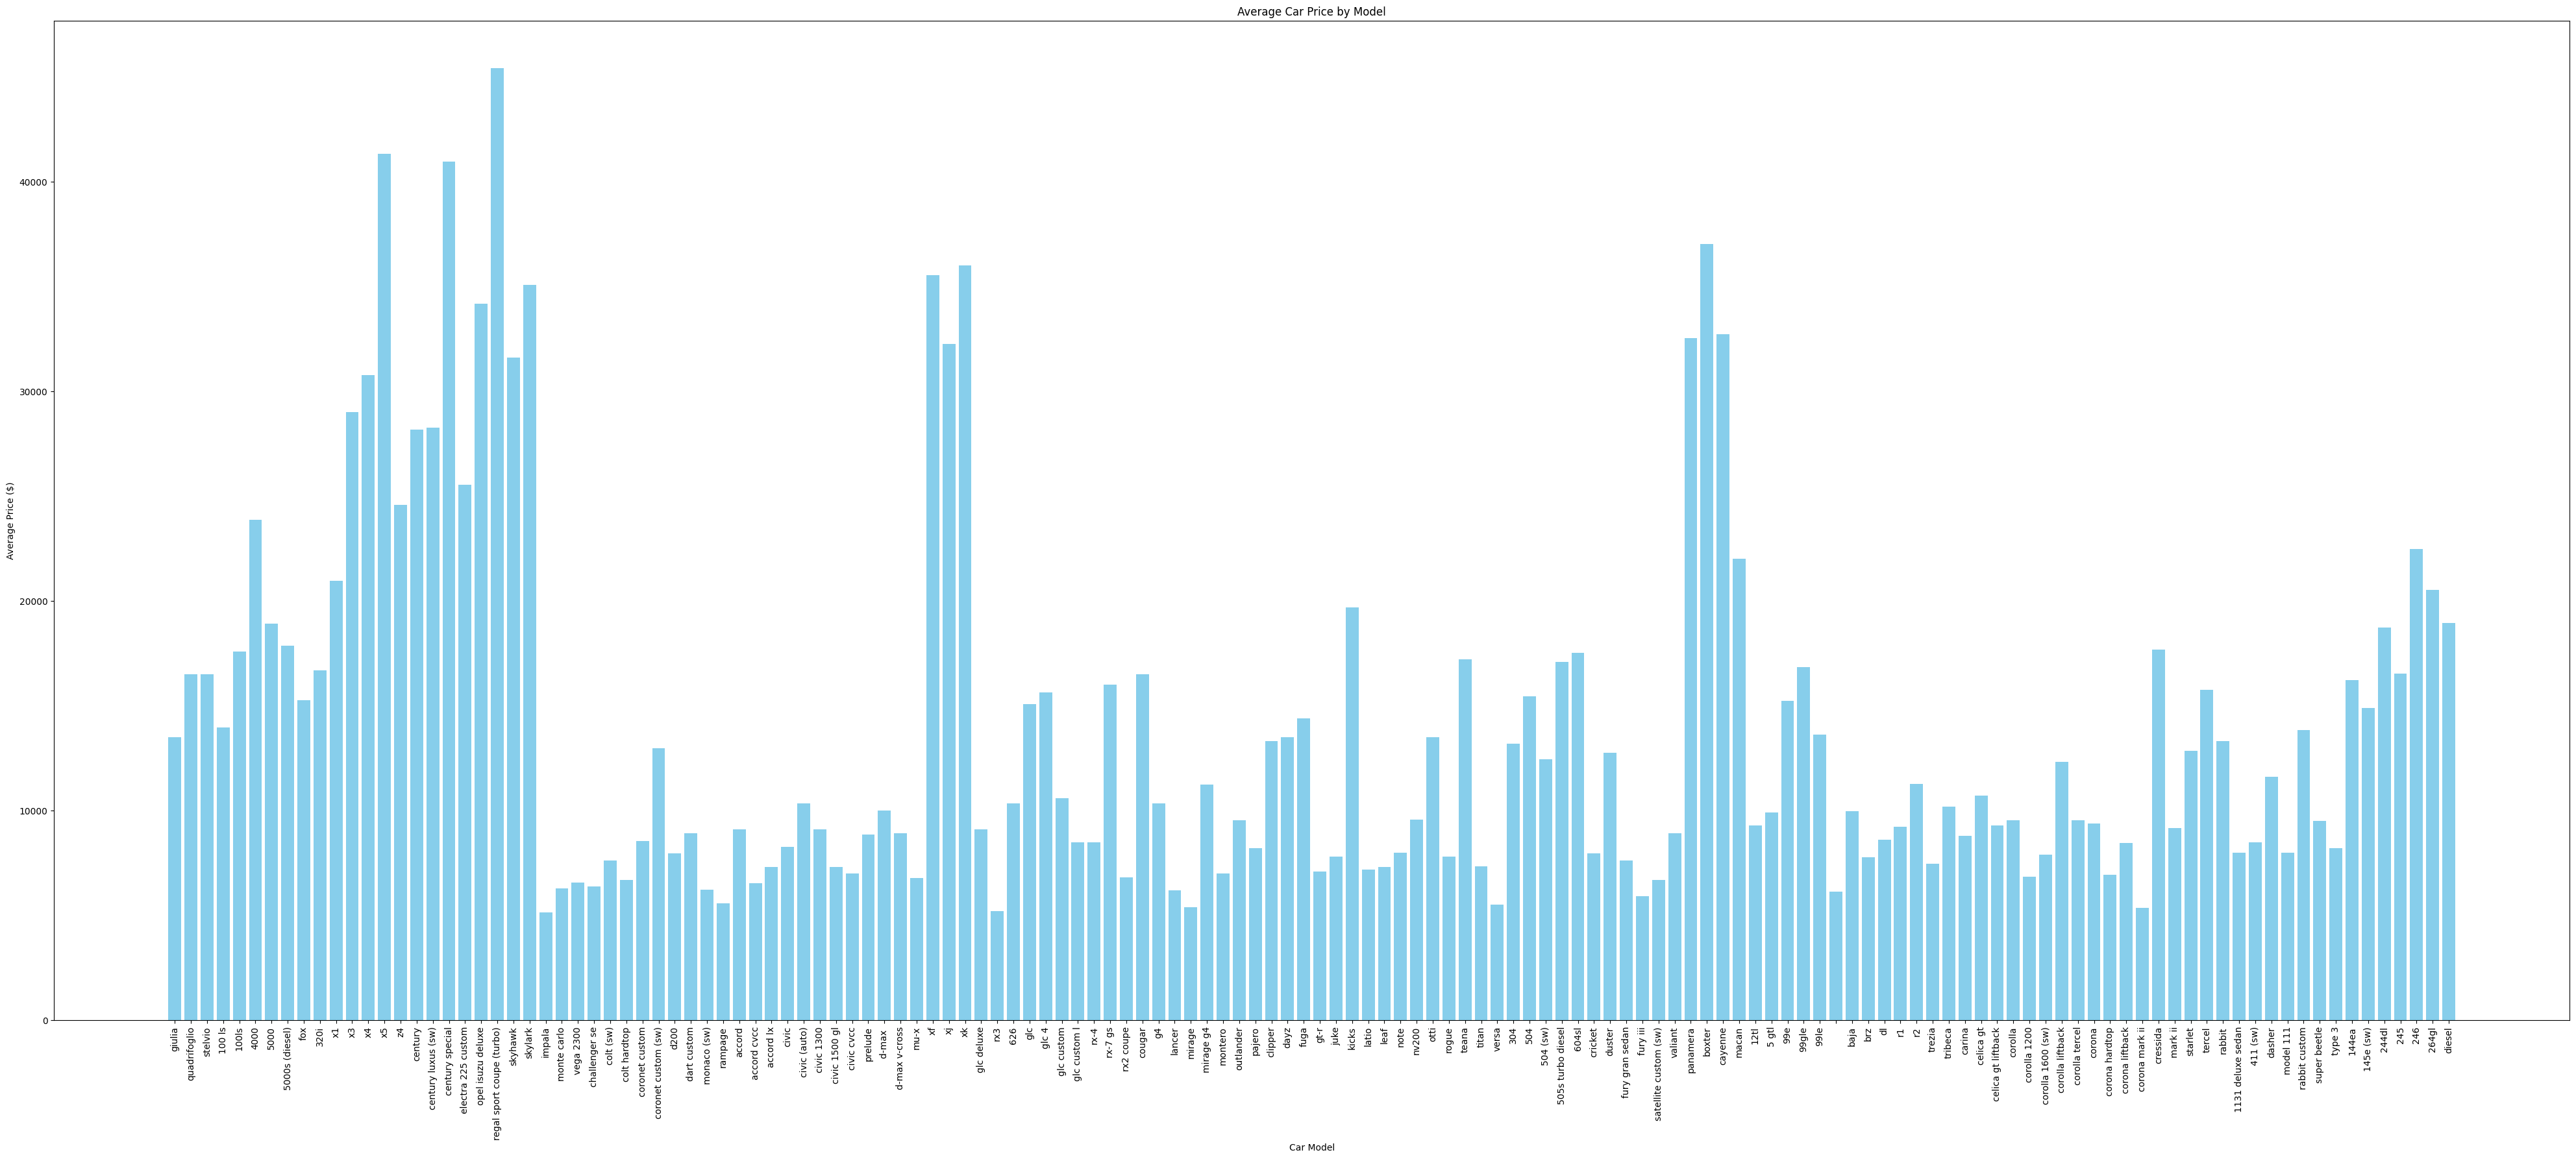

C:\Users\chris\AppData\Local\Temp\ipykernel_13996\2283933829.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




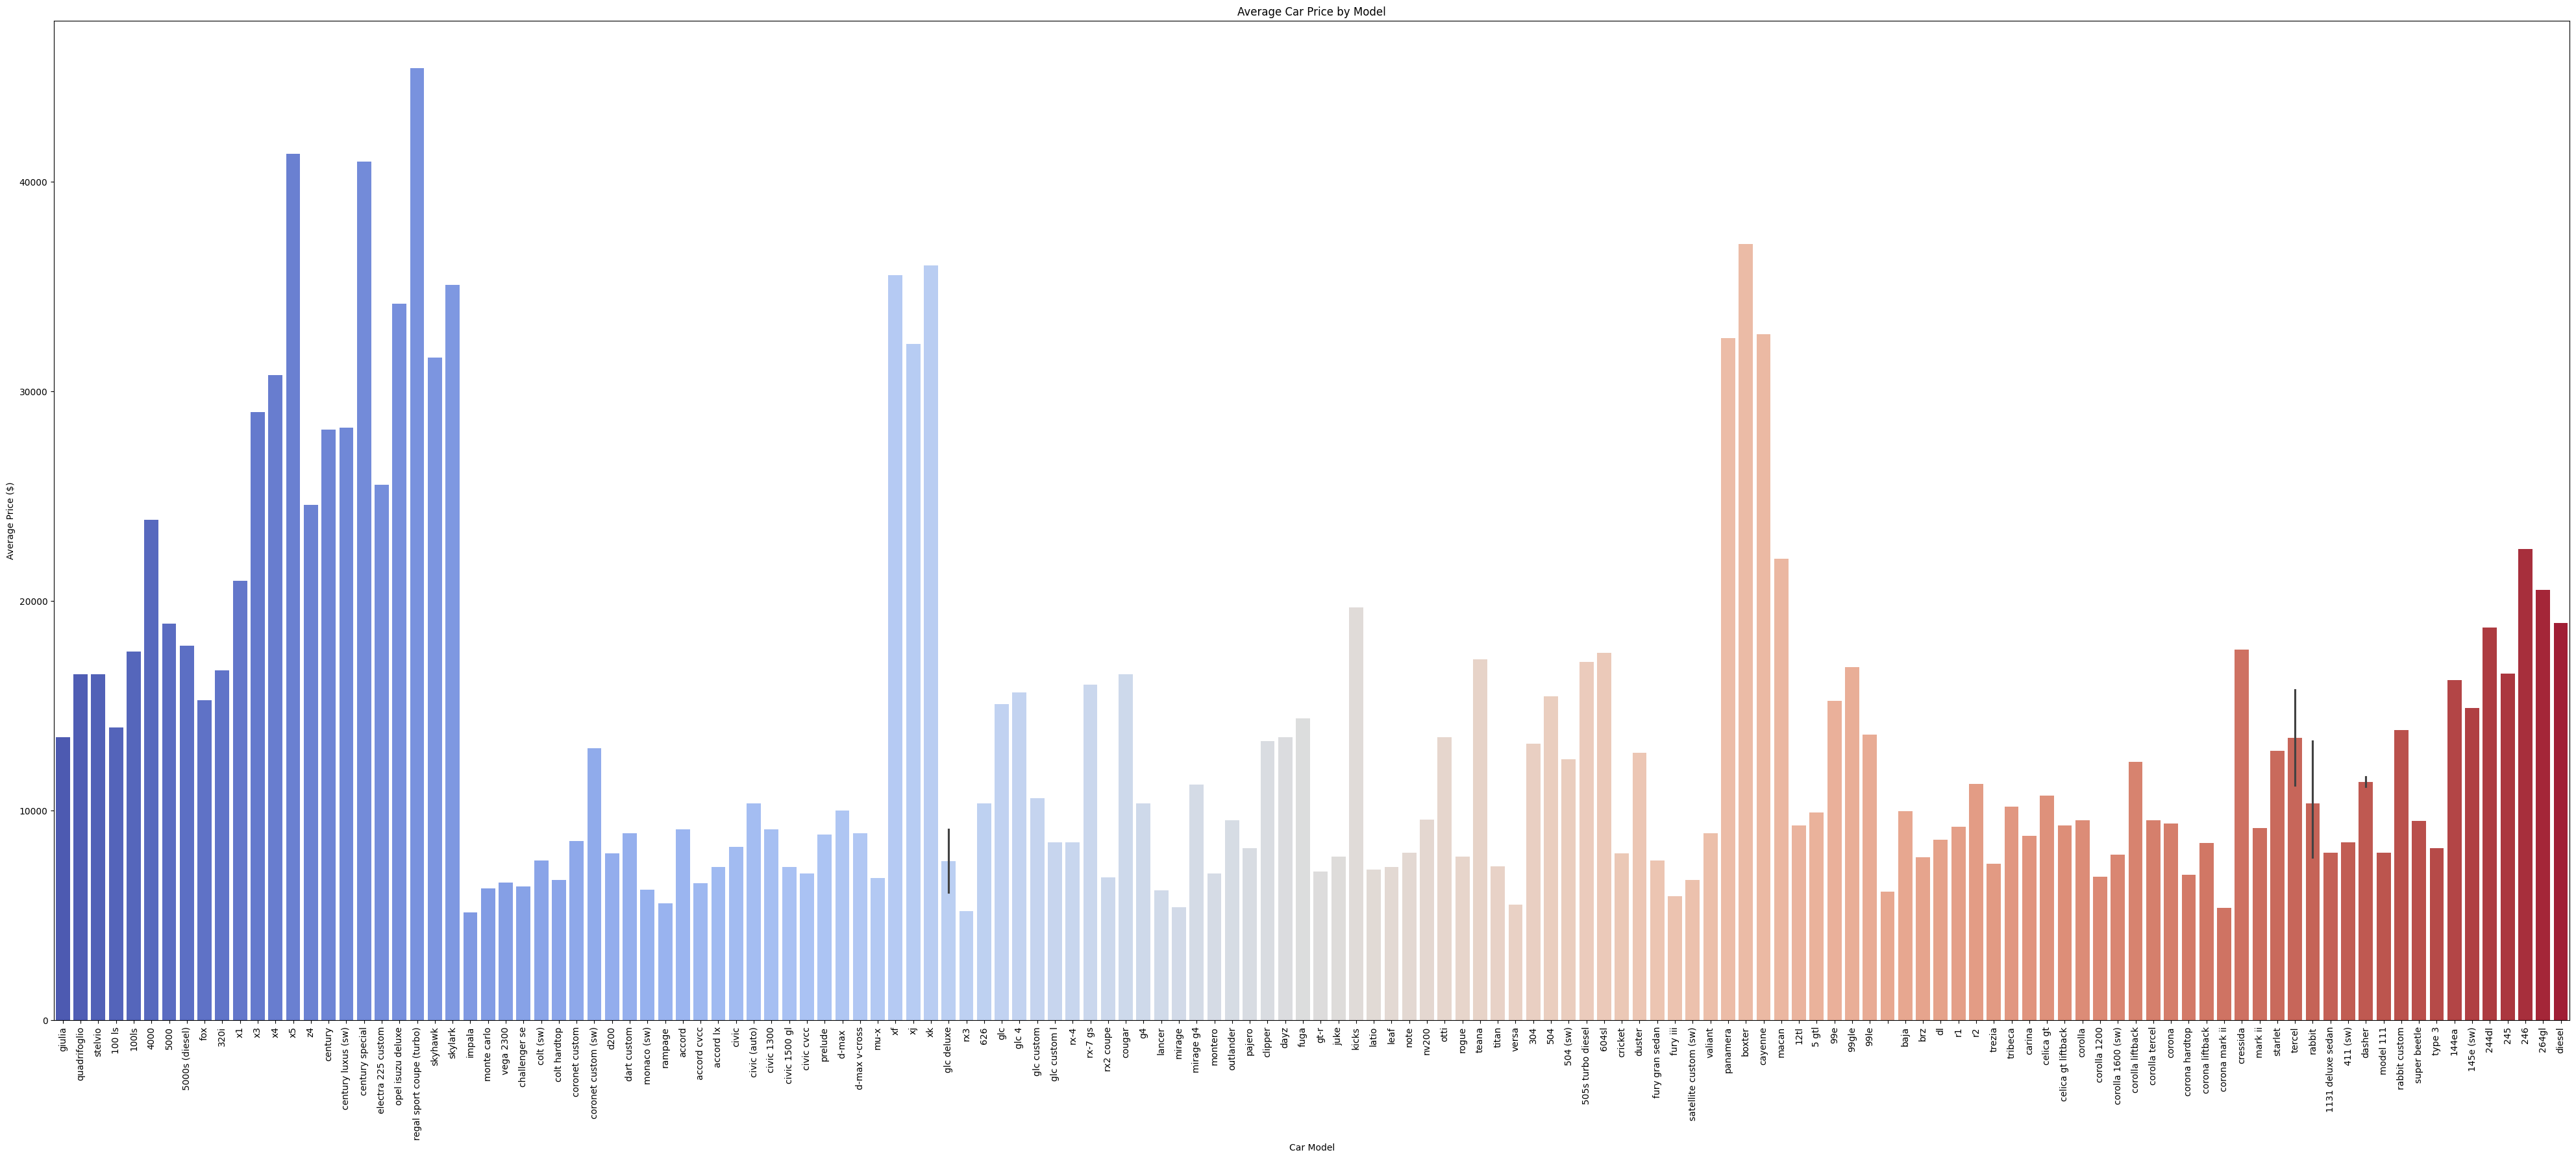

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Extract car brand and model from CarName
df['car_brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['car_model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]).lower())

# Compute average price by car brand
brand_avg_price = df.groupby('car_brand')['price'].mean().reset_index()


# Matplotlib Bar Chart
plt.figure(figsize=(50, 20))
plt.bar(model_avg_price['car_model'], model_avg_price['price'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Car Model")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price by Model")
plt.show()

# Seaborn Bar Chart
plt.figure(figsize=(50, 20))
sns.barplot(x='car_model', y='price', data=model_avg_price, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Car Price by Model")
plt.ylabel("Average Price ($)")
plt.xlabel("Car Model")
plt.show()

# Plotly Interactive Bar Chart
fig = px.bar(model_avg_price, x='car_model', y='price', color='price', title="Average Car Price by Model")
fig.show()


2. Correlation Analysis

Visualising relationships between attributes and car price

We will generate a correlation heatmap to examine how different features impact pricing

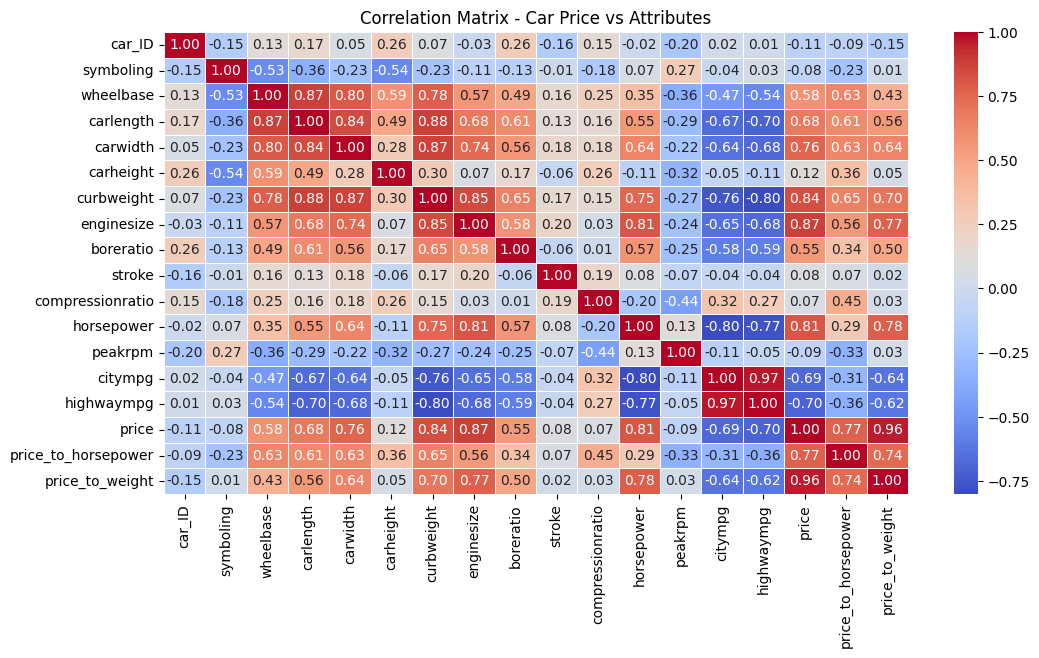

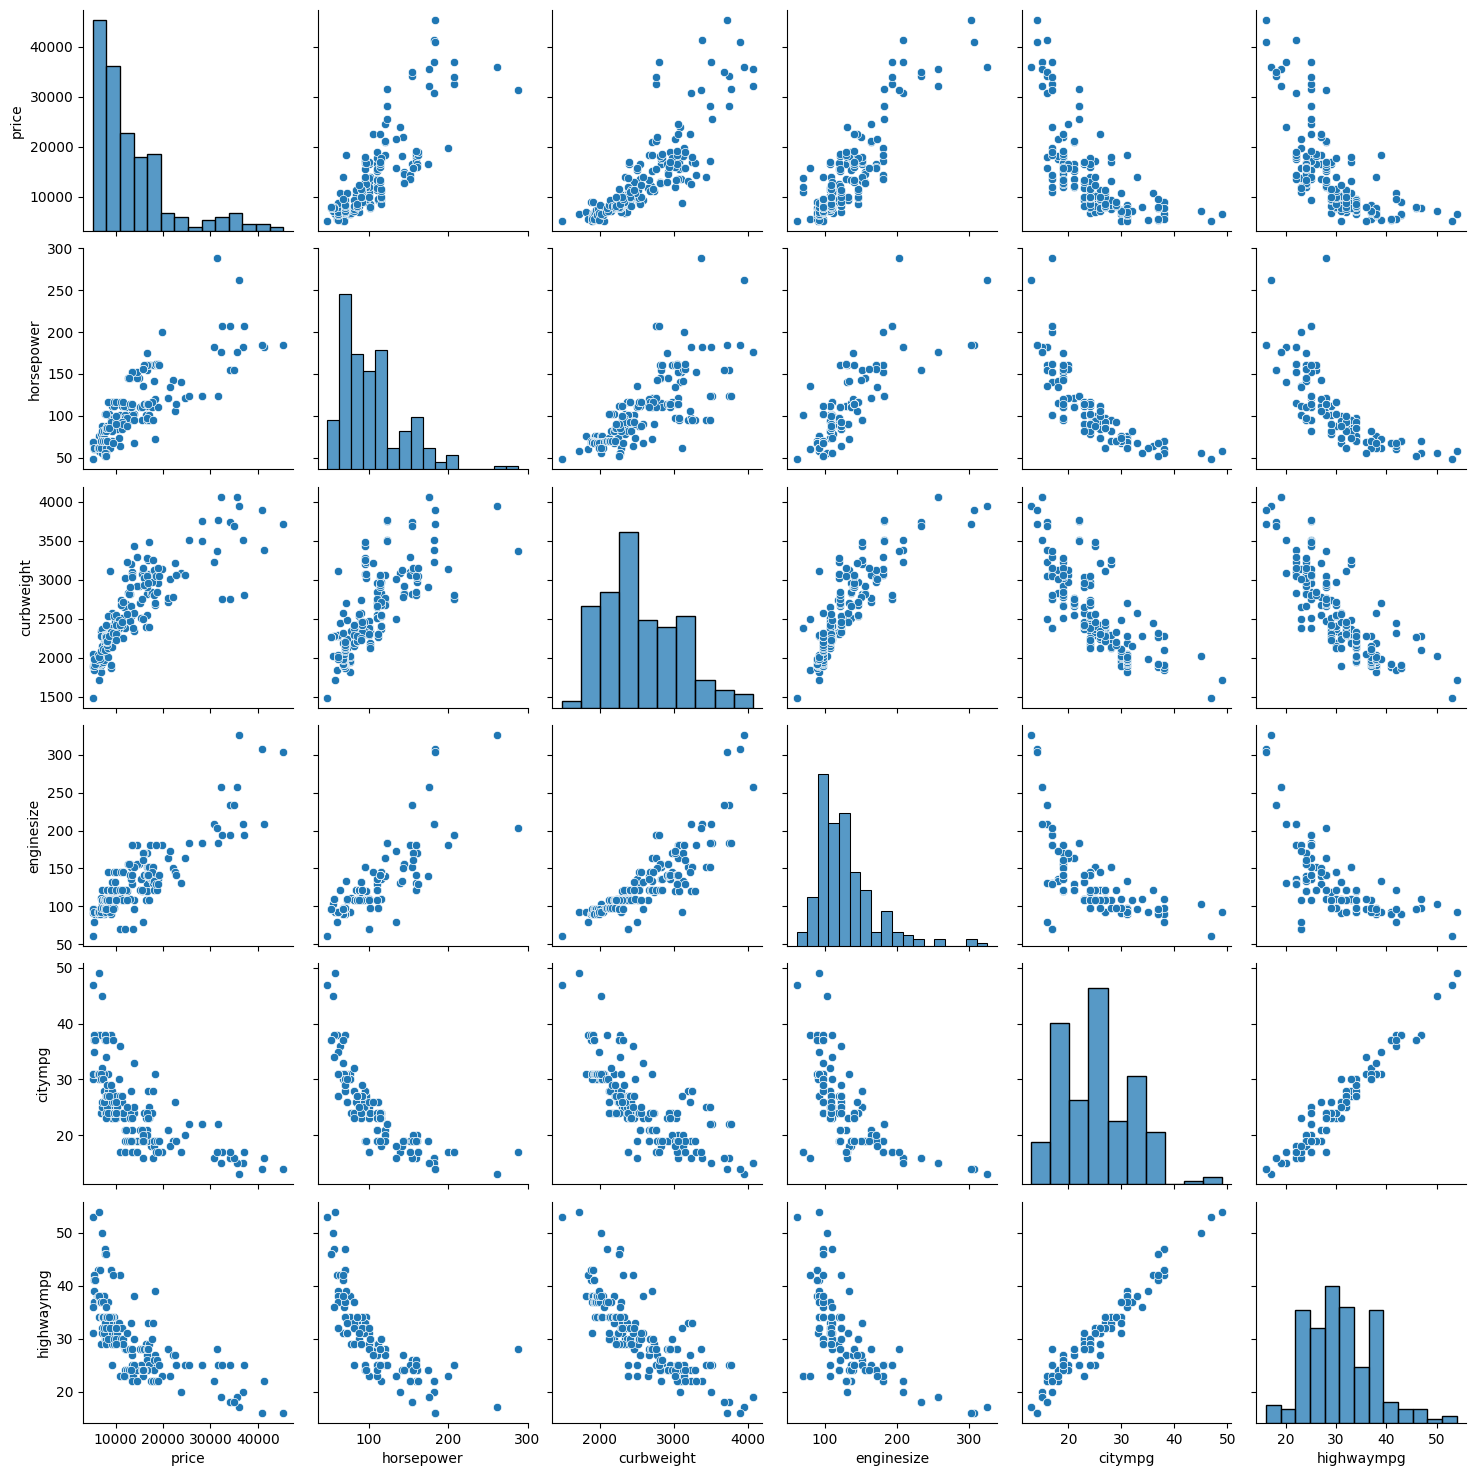

In [50]:
import numpy as np

# Compute correlation matrix using only numeric columns
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Seaborn Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix - Car Price vs Attributes")
plt.show()

# Pairplot for selected features
selected_features = ['price', 'horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg']
sns.pairplot(df[selected_features])
plt.show()


3. Predictive Analysis

Developing & Visualising Analytical Reports for Estimation

We will use a simple regression model to estimate car prices based on key attributes

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 1.5 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.1 MB 1.9 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.1 MB 2.0 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.1 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.3 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.1 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 2.4 MB/s eta 0:00:03
   --------------------- ---

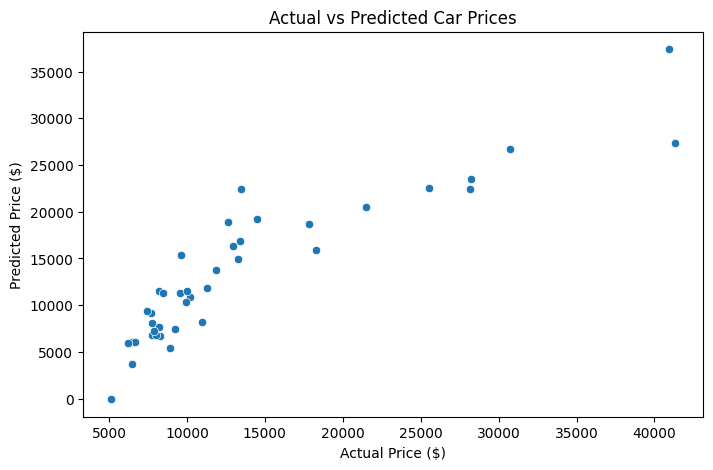

In [53]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features for prediction
features = ['horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg']
X = df[features]
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict car prices
y_pred = model.predict(X_test)

# Scatterplot of actual vs predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted Car Prices")
plt.show()


# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
!git add . CarPrice_Assignment_Cleaned.csv
!git commit -m "Add cleaned dataset"
!git push origin main

[main b4aeb69] Add cleaned dataset
 5 files changed, 396 insertions(+), 692 deletions(-)
 create mode 100644 4.2.0
 create mode 100644 jupyter_notebooks/4.2.0


To https://github.com/Betram-91/Hackathon-Car-Price-Analysis.git
   58f3412..b4aeb69  main -> main


In [ ]:
!git add . 
!git commit -m all
!git push 


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


Everything up-to-date


In [ ]:
!git add .
!git commit -m "add jupyter notebook"
!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


Everything up-to-date


## Descriptive Statistics